# Data Preprocessing on Toyota Dataset
1. Binning
2. Smoothening
3. Encoding
4. Scaling
5. Outlier analysis

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder

In [178]:
df = pd.read_csv('Toyota.csv')
df.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


In [180]:
df.isnull().sum()

Unnamed: 0      0
Price           0
Age           100
KM              0
FuelType      100
HP              0
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

In [181]:
df.duplicated().value_counts()

False    1436
Name: count, dtype: int64

In [182]:
df["Doors"].unique()

array(['three', '3', '5', '4', 'four', 'five', '2'], dtype=object)

## The Doors column has inconsistent data. We make it consistent by mapping it to correct values

Map the words to numbers (string), then numbers (string) to numbers (int)

In [183]:

df["Doors"] = df["Doors"].map({'three' : 3, 'four' : 4, 'five' : 5, '3' : 3, '2' : 2, '1' : 1, '0' : 0, '5' : 5, '4' : 4})


In [184]:
df.sample(frac=1).head()


,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
187,187,9500,38.0,180638,Diesel,90,0.0,0,2000,4,1160
877,877,9950,58.0,62024,Petrol,110,1.0,0,1600,5,1075
153,153,19500,12.0,13634,Petrol,110,1.0,0,1600,5,1115
963,963,9950,62.0,50000,Petrol,110,1.0,0,1600,5,1075
995,995,9950,68.0,42750,NaN,110,NaN,0,1600,3,1050


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   int64  
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 123.5+ KB


## Drop the redundant column that denotes serial number

In [186]:
df.drop('Unnamed: 0', axis = 1, inplace=True)
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

## Handle missing values of Age

Replacing them with the mean of the column

In [187]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [188]:
df.sample(frac=1).head(20)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1316,7450,75.000000,67451,Petrol,86,1.0,0,1300,4,1000
125,21750,16.000000,??,Petrol,110,1.0,0,1600,5,1130
715,8490,62.000000,90000,Petrol,110,0.0,0,1600,3,1050
136,18450,19.000000,27371,Petrol,97,0.0,0,1400,5,1135
1294,6950,80.000000,71740,Petrol,110,1.0,0,1600,5,1070
1140,6750,74.000000,104000,Petrol,86,1.0,0,1300,3,1010
105,16950,55.672156,13748,Petrol,97,1.0,0,1400,3,1100
470,10900,50.000000,65471,Petrol,97,1.0,0,1400,5,1060
120,18950,13.000000,57037,Petrol,110,0.0,0,1600,5,1115
190,11950,40.000000,161000,Diesel,69,1.0,0,1900,3,1105


## Handle missing values of FuelType

Replace them with the mode i.e. petrol in this case

In [189]:
df["FuelType"].value_counts().iloc[0]

1177

([<matplotlib.patches.Wedge at 0x7086a6826030>,
 [Text(-1.024006089442147, 0.40176053662026306, 'Petrol'),
  Text(1.0092010076630402, -0.4376223556125809, 'Diesel'),
  Text(1.0993157876137665, -0.038791740140453064, 'CNG')])

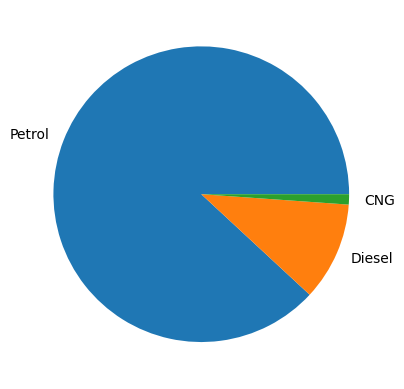

In [190]:
plt.pie(x=df['FuelType'].value_counts(), labels=df['FuelType'].value_counts().index)

In [191]:
df['FuelType'] = df['FuelType'].fillna(df['FuelType'].mode()[0])

In [192]:
df.sample(frac=1).head(20)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
890,7950,60.000000,61100,Petrol,86,1.0,0,1300,3,1015
383,8500,55.000000,150000,CNG,110,1.0,0,1600,3,1075
1097,7250,74.000000,124910,Diesel,72,0.0,0,2000,5,1135
1159,8750,79.000000,98742,Petrol,110,0.0,0,1600,5,1085
1103,7950,74.000000,123077,Petrol,86,NaN,0,1300,3,1015
669,9750,58.000000,105942,Petrol,86,0.0,0,1300,5,1040
1317,8250,55.672156,67266,Petrol,86,1.0,0,1300,5,1035
1334,6999,71.000000,64000,Petrol,110,NaN,0,1600,5,1070
1113,5750,73.000000,115877,Petrol,110,0.0,0,1600,4,1035
1418,7750,73.000000,39168,Petrol,86,NaN,0,1300,3,1015


In [193]:
df['FuelType'].isna().sum()

0

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   object 
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 112.3+ KB


## Handling Missing Values of MetColor

Again, replacing them with the mode

In [195]:
df['MetColor'].unique()

array([ 1., nan,  0.])

In [196]:
df['MetColor'].mode()

0    1.0
Name: MetColor, dtype: float64

In [197]:
df['MetColor'] = df['MetColor'].mode()[0]

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   object 
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 112.3+ KB


## Hence, all missing values have been handled.

## Will perform binning on Age

In [199]:
df['Age'].max()

80.0

In [200]:
df['Age'].min()

1.0

Since the distribution is not uniform, will employ the KMeans method.

In [201]:
df_copy1 = df
df_copy2 = df

In [203]:
kmeans = KMeans(n_clusters=5)
df_copy1['KMeans_Binned'] = kmeans.fit_predict(df_copy1[['Age']])
df_copy1

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KMeans_Binned
0,13500,23.000000,46986,Diesel,90,1.0,0,2000,3,1165,3
1,13750,23.000000,72937,Diesel,90,1.0,0,2000,3,1165,3
2,13950,24.000000,41711,Diesel,90,1.0,0,2000,3,1165,3
3,14950,26.000000,48000,Diesel,90,1.0,0,2000,3,1165,3
4,13750,30.000000,38500,Diesel,90,1.0,0,2000,3,1170,1
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,55.672156,20544,Petrol,86,1.0,0,1300,3,1025,0
1432,10845,72.000000,??,Petrol,86,1.0,0,1300,3,1015,2
1433,8500,55.672156,17016,Petrol,86,1.0,0,1300,3,1015,0
1434,7250,70.000000,??,Petrol,86,1.0,0,1300,3,1015,4


In [204]:
df_copy1['KMeans_Binned'].unique()

array([3, 1, 0, 4, 2], dtype=int32)

The values have been clustered into 5 bins

### The values around which the values have been clustered:

In [206]:
kmeans.cluster_centers_.flatten()

array([54.7622165 , 39.60176991, 76.55517241, 18.67088608, 65.70744681])

In [210]:
sorted_indices = kmeans.cluster_centers_.flatten().argsort()

In [214]:
cluster_labels = {}
cluster_labels[sorted_indices[0]] = 'New'
cluster_labels[sorted_indices[1]] = 'Recent'
cluster_labels[sorted_indices[2]] = 'Mid'
cluster_labels[sorted_indices[3]] = 'Old'
cluster_labels[sorted_indices[4]] = 'Ancient'

df_copy1['KMeans_Labels'] = df_copy1['KMeans_Binned'].map(cluster_labels)

([<matplotlib.patches.Wedge at 0x70869ee97fe0>,
 [Text(0.730542762550669, 0.822379031885442, 'Mid'),
  Text(-0.8887857017624432, 0.6481203409418975, 'Old'),
  Text(-0.7448233622850388, -0.809467824557845, 'Ancient'),
  Text(0.4131578251360721, -1.0194609416396643, 'Recent'),
  Text(1.0349362150495949, -0.3727023353546622, 'New')])

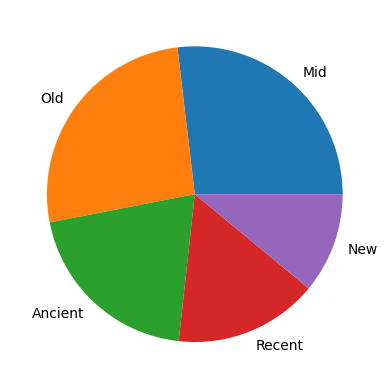

In [220]:
plt.pie(df_copy1['KMeans_Labels'].value_counts(), labels=df['KMeans_Labels'].value_counts().index)

## On the other hand, using a simple, straightforward method...

In [ ]:
df_copy2['time_period'] = pd.cut(df_copy2['Age'], 5, labels=['New', 'Recent', 'Mid', 'Old', 'Ancient'])

In [ ]:
df_copy2[df_copy2['Age'] == 1.0]

In [ ]:
df_copy2.sample(frac=1).head(20)

In [ ]:
df_copy2['time_period'].value_counts().plot(kind='bar', xlabel="Period", ylabel="Frequency")

# Data Smoothening will be done on Price

In [ ]:
df['Price'].min()

In [ ]:
df['Price'].max()

## Explanation
- We are sorting the price before applying the smoothening function (rolling mean) so that the groups that are formed have values that are closer to each other. By doing so, the mean produced and assigned will make more sense.

- Later we are reassigning the smoothened prices with the proper indices

In [ ]:
sorted_prices = df['Price'].sort_values().reset_index()
sorted_prices['Smooth_Price'] = sorted_prices['Price'].rolling(window=10).mean()

In [ ]:
sorted_prices

In [ ]:
index_prices = sorted_prices.sort_values(by='index').set_index('index')
index_prices

In [ ]:
df['Smooth_Price'] = index_prices['Smooth_Price']

In [ ]:
df.sample(frac=1).head(20)

In [ ]:
df[df['KM'] == '??']

In [ ]:
df[df['KM'] == '??'].value_counts().sum()

In [ ]:
df['KM'].dtype

In [ ]:
df['KM'] = df['KM'].replace('??', np.nan)

In [ ]:
df[df['KM'] == '??'].value_counts().sum()

In [ ]:
df['KM'].isna().sum()

In [ ]:
df['KM'].sample(frac=1).head(20)

In [ ]:
df['KM'] = df['KM'].fillna(0)

In [ ]:
df['KM'].isna().sum()

In [ ]:
df['KM'].dtype

In [ ]:
df['KM'] = df['KM'].astype(int)

In [ ]:
df['KM'].dtype

In [ ]:
df['KM'].sample(frac=1).head(20)

In [ ]:
round(df['KM'].mean())

In [ ]:
df['KM'] = df['KM'].replace(0, round(df['KM'].mean()))

In [ ]:
df['FuelType'].unique()